In [2]:
# colab 한글깨짐 해결위한 설치
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [1]:
# matplotlib 설정
from matplotlib import pyplot as plt
from matplotlib import rc

%matplotlib inline

# # mac OS 한글 깨짐 해결
# rc('font', family = 'AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

# colab 한글이 깨짐 해결
from matplotlib import font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
fm._rebuild()

# 런타임 다시 시작해야 한글 깨짐 해결가능!!!!

In [2]:
import warnings
warnings.filterwarnings('ignore')

`앙상블 학습`
* 여러 개의 classifier을 생성하고 예측을 결합하여 정확한 최종 예측을 도출하는 방법이다.
* 정형 데이터 분류 시에는 앙상블이 뛰어난 예측 성능을 보이고 있다.
* 대표적으로 `랜덤 포레스트`와 `그래디언트 부스팅` 알고리즘이 있다.
* 과적합으로 인해 예측 성능이 떨어지는 경우가 많은 Decision Tree 모델의 단점을 앙상블 학습을 통해 보완할 수 있다. 



# 배깅 (Bagging)

`bagging`
* Bootstrap aggregating 을 줄인 말이다. 
* `동일한 알고리즘`(ex. Decision Tree)의 여러 학습기를 생성하여 여러 개의 원본과 새로운 데이터 집단을 학습시키고 예측값을 합친다.

* bootstrap

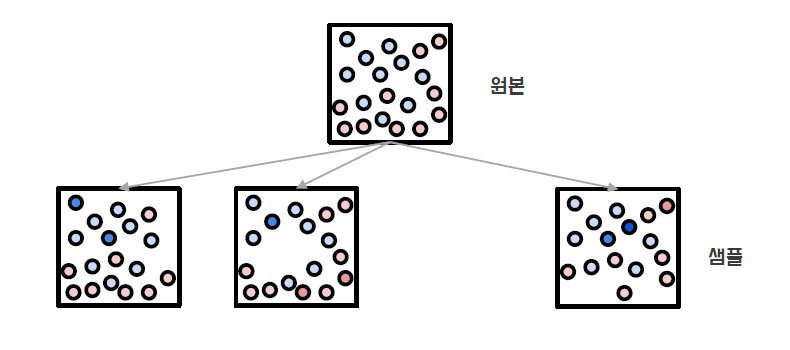

원본 데이터로부터 원본 데이터와 유사한 샘플 데이터 추출 (중복을 허용)

* aggregating

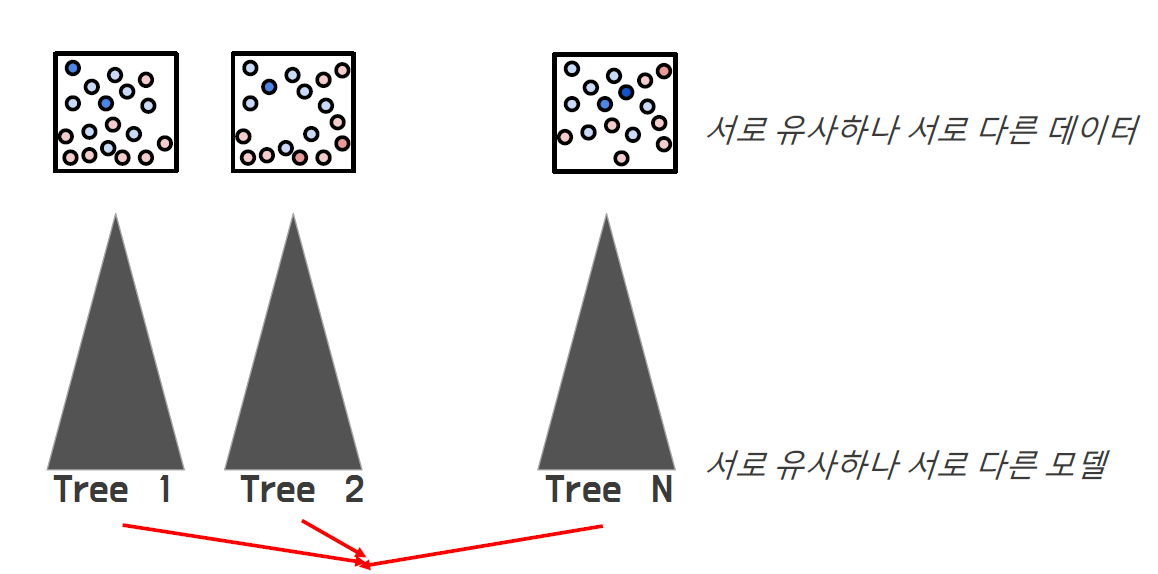

서로 다른 약한 학습기의 예측값 합치기 (회귀분석 -> 평균, 분류 -> 빈도수)

## 1) 붓꽃 데이터로 실습하기

### 1-1. 붓꽃 데이터 생성

붓꽃(iris) 꽃잎, 꽃받침의 너비와 길이를 측정한 데이터이며 150개의 샘플로 구성되어 있으며 3개의 레이블 클래스를 가진다.

feature  
* `sepal length` : 꽃받침의 길이
* `sepal width` : 꽃받침의 너비
* `petal length` : 꽃잎의 길이
* `petal width` : 꽃잎의 너비


<a title="No machine-readable author provided. Dlanglois assumed (based on copyright claims)., CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Iris_versicolor_3.jpg"><img width="512" alt="Iris versicolor 3" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/512px-Iris_versicolor_3.jpg"></a>  

<a href="https://commons.wikimedia.org/wiki/File:Iris_versicolor_3.jpg">No machine-readable author provided. Dlanglois assumed (based on copyright claims).</a>, <a href="http://creativecommons.org/licenses/by-sa/3.0/">CC BY-SA 3.0</a>, via Wikimedia Commons

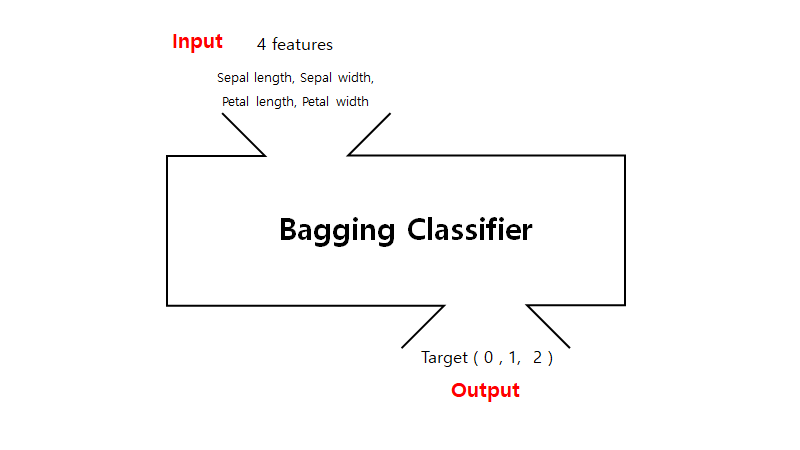

In [7]:
# 라이브러리 import
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import classification_report

In [8]:
# iris data를 불러온 후, iris 변수에 담아보자.
iris = load_iris()

In [9]:
# iris data를 학습용과 검증용 데이터 세트로 분리해보자.
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target,
                                                   stratify = iris.target,
                                                   shuffle = True, random_state=11)
# 시각화를 위해서 특성을 2개만 사용하였다. --> iris.data[:, :2]

### 1-2. Bagging Classifier 생성 및 검증

`BaggingClassifier(base_estimator, n_estimators, max_samples, bootstrap=True, oob_score=False, n_jobs=None)`
* 사이킷런의 ensemble에서 BaggingClassifier를 불러올 수 있다.

주요 parameter:
  - `base_estimator` : 어떤 모델로 평가를 할 지 정해줄 수 있는 파라미터이다. 값을 지정해주지 않으면 자동적으로 Decision Tree로 실행된다. (기본 값=None) 
  - `n_estimators` : 몇 개의 모델을 앙상블해서 훈련시킬지 정해주는 파라미터, (기본 값=10) 
  - `max_samples` : 데이터 중 몇 개의 데이터를 선택할 지 정해주는 파라미터, int형으로 갯수를 지정해줄 수 있고 float형식으로 비율을 정해줄 수 있다. (기본 값=1.0)  
  - `bootstrap` : 데이터의 중복 사용 여부를 정해줄 수 있다. (기본 값=TRUE)  
  - `n_jobs` : 훈련과 예측에서 사용할 CPU 코어 수를 지정할 수 있다. ( -1로 설정시 가용한 모든 코어 사용) (기본 값=None)
  - `oob_score` : 사용되지 않은 데이터}(out of bag samples)를 가지고 모델을 평가하도록 설정하는 파라미터, (기본 값=False)

참고: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html?highlight=bagging%20classifier#sklearn.ensemble.BaggingClassifier


In [10]:
# decision tree 모델을 기반으로 bagging classifier을 로드한 뒤 학습시켜보자.
# n_estimate 디시전 트리의 개수 설정 (100그루 설정)
# max_sample n개에서 몇개를 뽑아서 사본을 만들지 결정 (40개 설정)
# boostrap 원본으로부터 데이터를 뽑는 추출 방식 (true 기존 복원 추출) 
model_bag = BaggingClassifier(DecisionTreeClassifier(random_state = 10),
                              n_estimators = 100,
                              max_samples = 40).fit(X_train, y_train)

In [11]:
# 앙상블되지 않은 단일 decision tree 모델도 로드해보자.
model_dt = DecisionTreeClassifier(random_state = 0).fit(X_train, y_train)

In [12]:
# test data 대해서는 오히려 배깅을 사용한 알고리즘의 예측성능이 더 좋은 것을 확인할 수 있다. --> 과적합 보완 효과
print('배깅을 사용한 경우의 train score : {:.3f}'.format(model_bag.score(X_train, y_train)))
print('결정트리의 train score : {:.3f}\n'.format(model_dt.score(X_train, y_train)))
print('배깅을 사용한 경우의 test score : {:.3f}'.format(model_bag.score(X_test, y_test)))
print('결정트리의 test score : {:.3f}'.format(model_dt.score(X_test, y_test)))
# 결정 트리가 과적합 발생하였음을 확인할 수 있음 (배깅은 결정트리의 오버 피팅을 해결하기 위해 사용함)

배깅을 사용한 경우의 train score : 0.875
결정트리의 train score : 0.938

배깅을 사용한 경우의 test score : 0.789
결정트리의 test score : 0.684


In [13]:
# 결정 경계를 시각화해보자.
def model_border(model, X, y, contour=True):
    xmin = X[:, 0].min()
    xmax = X[:, 0].max()
    ymin = X[:, 1].min()
    ymax = X[:, 1].max()
    xminmax = np.arange(xmin, xmax, .02)
    yminmax = np.arange(ymin, ymax, .02)
    X1, X2 = np.meshgrid(xminmax, yminmax)
    X_pred = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(X_pred).reshape(X1.shape)
    plt.figure(figsize = (10, 5))
    plt.contourf(X1, X2, Z, alpha=0.3)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=0.5) # 클래스 0에 해당하는 X값 표시
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=0.5) # 클래스 1에 해당하는 X값 표시
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "y^", alpha=0.5) # 클래스 2에 해당하는 X값 표시
    plt.xlim([4.5, 7.6])
    plt.ylim([2.0, 4.0])
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

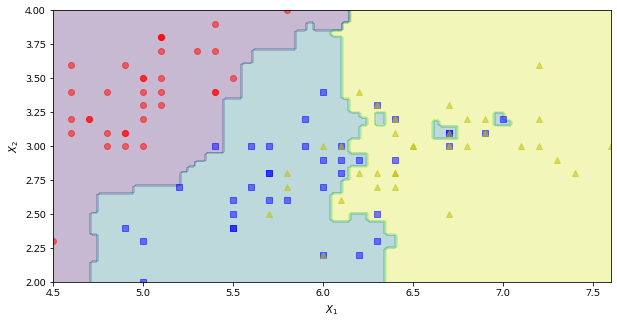

In [14]:
# 배깅모델 결정경계
model_border(model_bag, X_train, y_train)

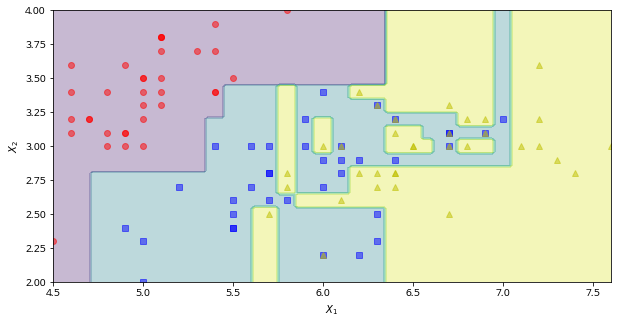

In [15]:
# 단일 트리모델 결정경계
model_border(model_dt, X_train, y_train)

- 배깅을 사용한 모델의 경계가 덜 불규칙한 모습을 띄고 있는 것을 확인할 수 있다.

# 랜덤 포레스트(Random Forest)

- 배깅의 대표적인 알고리즘으로서 기반 알고리즘으로 `decision tree`으로 갖고 있다. 
- 즉, 부트스트랩으로 만들어진 여러 샘플 데이터를 가지고 , Decision Tree를 여러 번 수행한 다음 이를 aggregate 하는 것이 Random Forest이다.
- 랜덤 포레스트는 n_estimators가 클수록 좋다. 그러나 너무 많은 트리는 훈련시간이 길어지는 단점이 있다. 그러므로 적당한 트리 수를 가용된 시간과 메모리의 양을 따져서 정해줘야 한다.


작동 과정
1. 학습 데이터 N 개로부터 중복을 허용하여 무작위로 샘플 데이터 N 개를 추출한다.
2. 샘플 데이터에서 중복을 허용하지 않고 , 무작위로 X 값 (input feature) d 개를 선택한다.
3. d 개의 feature 에 대해 Decision Tree 를 수행한다.
4. 위의 1-3 과정을 K 번 수행한다.

## 1) 붓꽃 데이터로 실습하기

### 1-1. Random Forest Classifier 생성 및 결정 경계 시각화

In [16]:
from sklearn.ensemble import RandomForestClassifier

`class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=None)`

주요 paramter:
  - 랜덤 포레스트의 파라미터는 BaggingClassifier와 DecisionTreeClassifier를 제어하는 파라미터를 모두 가지고 있다.(splitter, presort, max_samples, base_estimator를 제외한다.)
  - `n_estimators` : 트리의 수를 설정한다.(Bagging 과 DecisionTree의 결합이기 때문에)
  - `max_features` : 각 노드에서 선택하는 특성의 수 (무작위 선택), max_features의 값이 커지면 각 트리들은 비슷해지고, 값을 낮추면 트리들이 서로 많이 달라지고 데이터에 맞추기 위해 깊이가 깊어지게 된다.

참고: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [17]:
# random forest classifier을 로드한 뒤 앞서 생성한 붖꽃 데이터를 학습시켜보자.
# 트리의 수는 8개이다.
model_rf = RandomForestClassifier(n_estimators = 8, 
                                  random_state = 0).fit(X_train, y_train)

`앙상블.estimators_`
* 랜덤 포레스트로 만들어진 트리는 estimators_에 저장이된다.

In [18]:
# 앙상블에 사용된 학습기를 조회해보자.
model_rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_features='auto', random_state=1537364731),
 DecisionTreeClassifier(max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_features='auto', random_state=1491434855)]

`앙상블.classes_`
* 클래스는 array로 classes_에 저장되어 있다.

In [19]:
# 클래스를 조회해보자. (0 = setosa, 1 = versicolot, 2 = virginica)
model_rf.classes_

array([0, 1, 2])

In [20]:
# 결정 경계를 시각화해보자.
def draw_border(model, X, y, contour=True):
    xmin = X[:, 0].min()
    xmax = X[:, 0].max()
    ymin = X[:, 1].min()
    ymax = X[:, 1].max()
    xminmax = np.arange(xmin, xmax, .02)
    yminmax = np.arange(ymin, ymax, .02)
    X1, X2 = np.meshgrid(xminmax, yminmax)
    X_pred = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(X_pred).reshape(X1.shape)
    plt.contourf(X1, X2, Z, alpha=0.3)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=0.5) # 클래스 0에 해당하는 X값 표시
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=0.5) # 클래스 1에 해당하는 X값 표시
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", alpha=0.5) # 클래스 2에 해당하는 X값 표시
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])

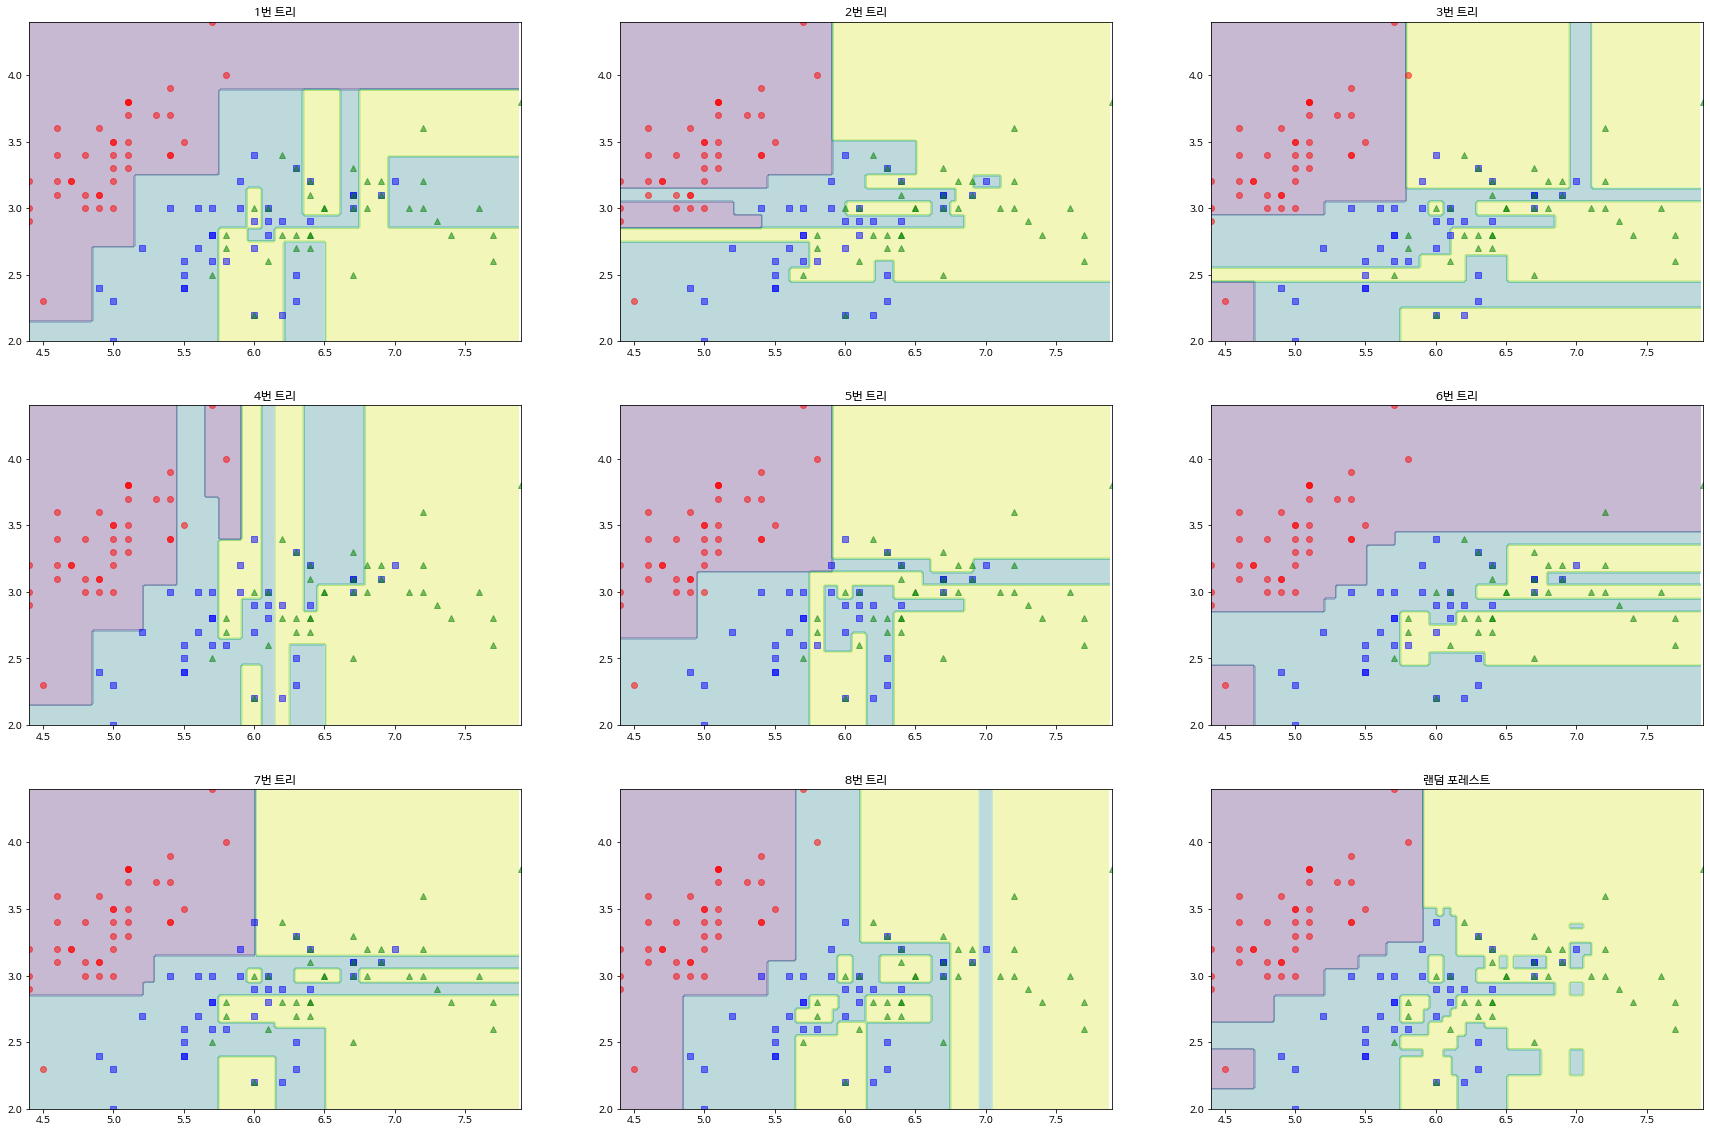

In [21]:
plt.figure(figsize = (30, 20))

# 앙상블 내 개별 모델의 결정경계 시각화
for i in [1,2,3,4,5,6,7,8]:
    plt.subplot(3,3,i) # plt.sublpot(3,3,i)은 3행 3열 i번째 공간에 그래프를 그린다.
    plt.title("{}번 트리".format(i))
    draw_border(model_rf.estimators_[i-1], X_train, y_train)

# 랜덤 포레스트 전체의 결정경계 시각화
plt.subplot(3,3,9)
plt.title("랜덤 포레스트")
draw_border(model_rf, X_train, y_train)
# 앞에 있는 8개를 합쳐서 마지막것이 랜던 포레스트의 결과물
# 각 부분에 예측을 8개 중 다수결로 보팅하여 예측->  마지막 결과물에 반영



- 아홉 개의 트리마다 경계가 각각 다르다는 것을 확인할 수 있다.  
- 예제에서는 아홉개의 트리만 이용했지만 큰 데이터를 이용해서 트리의 개수를 수백 개 또는 그 이상으로 늘리면 경계가 더 부드러워진다.

In [29]:
# 8개의 학습기를 사용한 random forest classifier의 성능을 알아보자.
print('train score : {:.3f}'.format(model_rf.score(X_train, y_train)))
print('test score : {:.3f}'.format(model_rf.score(X_test, y_test)))

pred = model_rf.predict(X_test)
print('분류 report:\n', classification_report(y_test, pred))

train score : 0.929
test score : 0.737
분류 report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.62      0.62      0.62        13
           2       0.62      0.62      0.62        13

    accuracy                           0.74        38
   macro avg       0.74      0.74      0.74        38
weighted avg       0.74      0.74      0.74        38



## 2) 유방암 데이터로 실습하기

### 2-1. 유방암 데이터 생성

위스콘신 대학교에서 제공한 유방암 진단결과 데이터이다.  

feature  
* 양성(benign, 0)과 악성(malignant, 1)을 구분할 수 있는 종양의 크기, 모양 등의 다양한 특성값을 가진다.
* `mean_` : 1 ~ 10번째 feature는 특성별 평균값을 의미한다.
* `_error` : 11 ~ 20번째 feature는 특성별 표준오차(Standard Error)를 의미한다.
* `worst_` : 21 ~ 30번째까지는 각 종양의 특성들에서 제일 큰 3개의 값을 평균낸 값을 의미한다.


<a title="Preethi Sekar, Jyotsna Naresh Bharti, Jitendra Singh Nigam, Ankit Sharma, and Priyanka Bhatia Soni, CC BY 3.0 &lt;https://creativecommons.org/licenses/by/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg"><img width="512" alt="Micrograph of ductal carcinoma with marked nuclear pleomorphism and increased mitotic rate" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg/512px-Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg"></a>

<a href="https://commons.wikimedia.org/wiki/File:Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg">Preethi Sekar, Jyotsna Naresh Bharti, Jitendra Singh Nigam, Ankit Sharma, and Priyanka Bhatia Soni</a>, <a href="https://creativecommons.org/licenses/by/3.0">CC BY 3.0</a>, via Wikimedia Commons

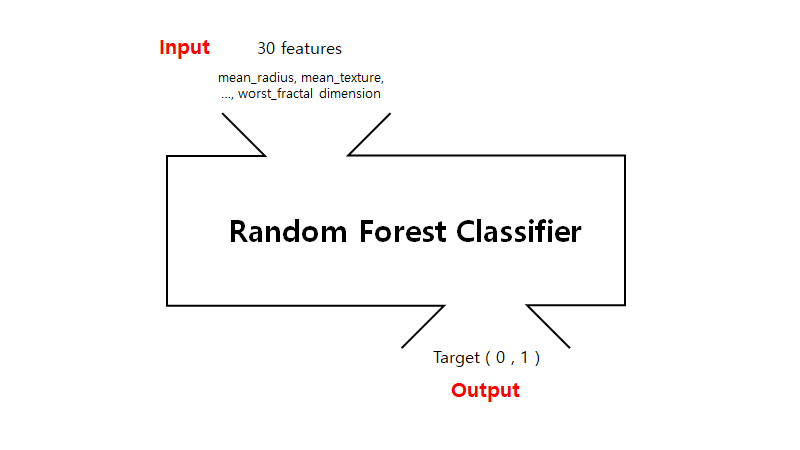

In [37]:
# 유방암 데이터를 로드해보자.
from sklearn.datasets import load_breast_cancer

data_cancer = load_breast_cancer()

In [38]:
# 데이터프레임으로 확인해보자.
import pandas as pd

x_cancer = pd.DataFrame(data_cancer.data, columns=data_cancer.feature_names)
y_cancer = pd.DataFrame(data_cancer.target, columns=['target'])
df_cancer = pd.concat([x_cancer, y_cancer], axis=1)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [39]:
# 학습용 검증용 데이터로 분리해보자.
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size = 0.2,
                                                   shuffle = True)

NameError: ignored

### 2-2. Random Forest Classifier 생성 및 특성 중요도 시각화

In [ ]:
# decision tree 개수가 50개인 ranodom forest classifier을 생성하여 cancer 데이터를 학습시켜보자.
from sklearn.ensemble import RandomForestClassifier

randf = RandomForestClassifier(n_estimators=50, 
                               random_state=42).fit(X_train, y_train)

In [ ]:
# 특성 중요도를 조회해보자.
randf.feature_importances_

- 특성의 중요도를 살펴보면 0인 값이 존재하지 않는다.

In [ ]:
#  단일 모델인 decision tree classifier을 생성하여 cancer 데이터를 학습시켜보자.
dtc = DecisionTreeClassifier(criterion="entropy", max_depth = 5,
                            random_state=42).fit(X_train, y_train)

In [ ]:
dtc.feature_importances_

* 반면, dicision tree classifier에서는 0인 값이 존재한다.

In [ ]:
# 두 모델의 feature importances를 시각화해보자.
plt.figure(figsize = (10,10))
X = np.arange(cancer.data.shape[1])
Y1 = randf.feature_importances_
Y2 = dtc.feature_importances_
plt.barh(X, Y1)
plt.barh(X, -Y2)
plt.yticks(X, cancer.feature_names)
plt.xlim([-0.7, 0.2])
plt.ylim(-1, cancer.data.shape[1])
plt.legend(["랜덤포레스트", "결정 트리"])
plt.show()

- 결정트리에선 worst radius 특성이 매우 중요하다고 나오지만 랜덤 포레스트에서는 worst radius를 중요하게 생각하지만 그에 못지않게 중요도가 높게 나오는 특성들이 존재한다.

## 3) 심화학습 (pseudocode)

출처: https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/random_forest.py

    class RandomForest:
        
    학정 과정
        def fit(X_data, y_data):
            1) 학습기(decision tree)를 생성한다.
            2) booststrap을 수행하여 샘플 데이터를 생성한다.
                2-1. 중복을 허락하여 랜덤으로 데이터의 수만큼 샘플 데이터의 인덱스를 구한다.
                2-2. 샘플 데이터의 인덱스에 해당하는 X, y 데이터를 return
            3) 샘플 데이터로 학습기(decision tree)를 학습시킨다.
            4) 학습된 학습기를 저장한다.
            5) 1-4 과정을 n_tree번만큼 반복한다.

    예측 과정
        def predict(X_data):
            1) 저장된 모든 학습기로 예측을 수행한다.
            2) aggregate한다.
                2-1. 가장 빈도수가 높은 label을 찾는다.
            3) aggregation 결과를 return

    평가 과정
        def accuracy(y, y_pred):
            1) 정확도를 구한다.
                1-1. 오류(=실제값과 예측치의 차이)의 합을 구한다.
                1-2. 오류를 예측치의 개수로 나눈다.
            2) 정확도를 return
            

In [ ]:
from collections import Counter

import numpy as np

from sklearn.tree import DecisionTreeClassifier

# booststrap 과정
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    # 1) 중복을 허락하여 랜덤으로 데이터의 수만큼 샘플 데이터의 인덱스를 구한다. 
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    # 2) 샘플 데이터의 인덱스에 해당하는 X, y 데이터를 return
    return X[idxs], y[idxs]

# aggregation 과정
def most_common_label(y):
    counter = Counter(y)
    # 1) 가장 빈도수가 높은 label을 찾는다.
    most_common = counter.most_common(1)[0][0]
    # 2) 해당 label을 return
    return most_common


class RandomForest:
    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.trees = []
    # 학습 과정
    def fit(self, X, y):
        self.trees = []
        # 5) 1-4 과정을 n_tress번만큼 반복한다.
        for _ in range(self.n_trees):
            # 1) 학습기(decision tree)를 생성한다.
            tree = DecisionTreeClassifier(
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth
            )
            # 2) booststrap을 수행하여 샘플 데이터를 생성한다.
            X_samp, y_samp = bootstrap_sample(X, y)
            # 3) 샘플 데이터로 학습기(decision tree)를 학습시킨다.
            tree.fit(X_samp, y_samp)
            # 4) trees(생성된 학습기 list)에 학습된 학습기를 저장한다.
            self.trees.append(tree)
    
    # 예측 과정
    def predict(self, X):
        # 1) trees에 저장된 모든 학습기로 예측을 수행한다. 
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        # 2) aggregate한다.
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        # 3) aggregation 결과를 return
        return np.array(y_pred)


# 평가 과정
if __name__ == "__main__":
    # Imports
    from sklearn import datasets
    from sklearn.model_selection import train_test_split

    def accuracy(y_true, y_pred):
        # 1) 정확도를 구한다.
        #   1-1. 오류(=실제값과 예측치의 차이)의 합을 구한다.
        #   1-2. 오류를 예측치의 개수로 나눈다.
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

Accuracy: 0.9122807017543859


In [ ]:
    data = datasets.load_breast_cancer()
    X = data.data
    y = data.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    clf = RandomForest(n_trees=3, max_depth=10)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy(y_test, y_pred)

    print("Accuracy:", acc)